## **Data Collection**

In [1]:
import numpy as np 
import pandas as pd 
import os
import warnings
warnings.filterwarnings("ignore")


train_dir = '/kaggle/input/vegetable-image-dataset/Vegetable Images/train'
test_dir = '/kaggle/input/vegetable-image-dataset/Vegetable Images/test'
validation_dir = '/kaggle/input/vegetable-image-dataset/Vegetable Images/validation'



def count_images(directory):
    
    categories = os.listdir(directory)

    category_count = {category: len(os.listdir(os.path.join(directory, category))) for category in categories}
    return category_count




train_count = count_images(train_dir)
test_count = count_images(test_dir)
validation_count = count_images(validation_dir)



print(f"Train sample count : {train_count}\n")
print(f"Test sample count : {test_count}\n")
print(f"Validation sample count : {validation_count}")


Train sample count : {'Broccoli': 1000, 'Capsicum': 1000, 'Bottle_Gourd': 1000, 'Radish': 1000, 'Tomato': 1000, 'Brinjal': 1000, 'Pumpkin': 1000, 'Carrot': 1000, 'Papaya': 1000, 'Cabbage': 1000, 'Bitter_Gourd': 1000, 'Cauliflower': 1000, 'Bean': 1000, 'Cucumber': 1000, 'Potato': 1000}

Test sample count : {'Broccoli': 200, 'Capsicum': 200, 'Bottle_Gourd': 200, 'Radish': 200, 'Tomato': 200, 'Brinjal': 200, 'Pumpkin': 200, 'Carrot': 200, 'Papaya': 200, 'Cabbage': 200, 'Bitter_Gourd': 200, 'Cauliflower': 200, 'Bean': 200, 'Cucumber': 200, 'Potato': 200}

Validation sample count : {'Broccoli': 200, 'Capsicum': 200, 'Bottle_Gourd': 200, 'Radish': 200, 'Tomato': 200, 'Brinjal': 200, 'Pumpkin': 200, 'Carrot': 200, 'Papaya': 200, 'Cabbage': 200, 'Bitter_Gourd': 200, 'Cauliflower': 200, 'Bean': 200, 'Cucumber': 200, 'Potato': 200}


In [2]:
def get_all_images(directory):
    
   # hold all image paths
    all_images = []

  
    for root, dirs, files in os.walk(directory):
        for file in files:
            
            all_images.append(os.path.join(root, file))
                                           
    #print(all_images)
    
    return all_images

# Get all images from the respective directories
train_images = get_all_images(train_dir)
test_images = get_all_images(test_dir)
validation_images = get_all_images(validation_dir)

### **Plot the Images** 

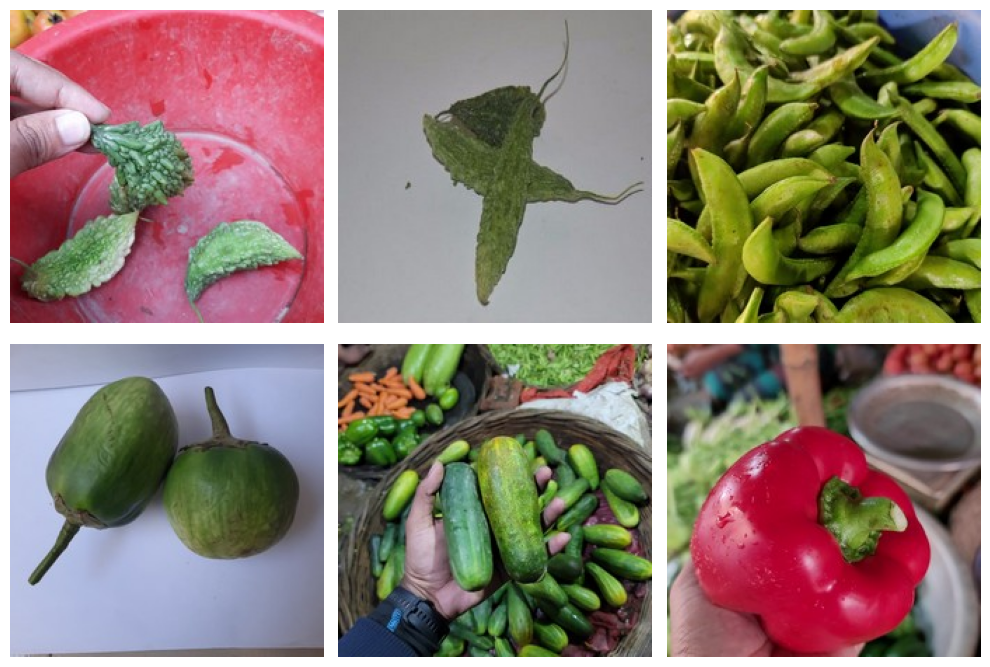

In [3]:
import matplotlib.pyplot as plt
import random
import cv2 


image_list = train_images 

# Shuffle the image list randomly
random.shuffle(image_list)

# Define the number of rows and columns for the subplot
rows = 2
cols = 3

# Create a subplot grid
fig, axes = plt.subplots(rows, cols, figsize=(10, 7))

# Flatten the axes array to easily iterate over it
axes = axes.flatten()


for i, img_path in enumerate(image_list):
    if i < len(axes): 
        # Load the image using OpenCV
        img = cv2.imread(img_path)
        
        # Convert the image from BGR (OpenCV format) to RGB (Matplotlib format)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        # Display the image in the subplot
        axes[i].imshow(img)
        axes[i].axis('off') 


plt.tight_layout()
plt.show()

# **Data Pre-Processing**

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


#  (normalizing the images)
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)
validation_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Load and preprocess the training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Resize images 
    batch_size=32,           #  images to process in a batch
    class_mode='categorical' 
)

# Load and preprocess the validation data
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
    
)


Test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 15000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.
Found 3000 images belonging to 15 classes.


 ## *Model Building*

In [5]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(train_generator.num_classes, activation='softmax')  # Number of classes
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Use 'binary_crossentropy' for binary classification
              metrics=['accuracy'])

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │         7,695 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,460,303 (13.20 MB)

 Trainable params: 3,460,303 (13.20 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20,  # Number of epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)


Epoch 1/20


I0000 00:00:1725238919.402505      92 service.cc:145] XLA service 0x7956f0004b30 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1725238919.402569      92 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1725238919.402574      92 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  3/468 ━━━━━━━━━━━━━━━━━━━━ 35s 76ms/step - accuracy: 0.0365 - loss: 2.7670

I0000 00:00:1725238923.724108      92 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


468/468 ━━━━━━━━━━━━━━━━━━━━ 86s 168ms/step - accuracy: 0.3928 - loss: 1.7524 - val_accuracy: 0.7560 - val_loss: 0.7364
Epoch 2/20
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7500 - loss: 0.9561 - val_accuracy: 0.7083 - val_loss: 0.8287
Epoch 3/20
468/468 ━━━━━━━━━━━━━━━━━━━━ 28s 59ms/step - accuracy: 0.8242 - loss: 0.5458 - val_accuracy: 0.8821 - val_loss: 0.3729
Epoch 4/20
468/468 ━━━━━━━━━━━━━━━━━━━━ 0s 60us/step - accuracy: 0.9375 - loss: 0.1887 - val_accuracy: 0.8750 - val_loss: 0.4008
Epoch 5/20
468/468 ━━━━━━━━━━━━━━━━━━━━ 29s 61ms/step - accuracy: 0.9245 - loss: 0.2338 - val_accuracy: 0.9274 - val_loss: 0.2384
Epoch 6/20
468/468 ━━━━━━━━━━━━━━━━━━━━ 0s 55us/step - accuracy: 0.9375 - loss: 0.1219 - val_accuracy: 1.0000 - val_loss: 0.1285
Epoch 7/20
468/468 ━━━━━━━━━━━━━━━━━━━━ 28s 59ms/step - accuracy: 0.9573 - loss: 0.1384 - val_accuracy: 0.9395 - val_loss: 0.2010
Epoch 8/20
468/468 ━━━━━━━━━━━━━━━━━━━━ 0s 44us/step - accuracy: 1.0000 - loss: 0.0218 - val_accuracy: 0

## **Model Evaluation**

In [7]:
# Evaluate the model
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation Accuracy: {accuracy:.2f}')




94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.9567 - loss: 0.1820
Validation Accuracy: 0.96


In [8]:
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

Test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 3000 images belonging to 15 classes.


In [9]:
# Evaluate on test data
test_loss, test_accuracy = model.evaluate(Test_generator)
print(f'\nTest Loss: {test_loss : .3f}, Test Accuracy: {test_accuracy : .3f}')

94/94 ━━━━━━━━━━━━━━━━━━━━ 18s 194ms/step - accuracy: 0.9615 - loss: 0.1982

Test Loss:  0.155, Test Accuracy:  0.965


In [10]:

y_pred = model.predict(Test_generator)

# Convert predicted probabilities to class indices
y_pred_classes = np.argmax(y_pred, axis=1)

# Get true labels from the generator
y_true_classes = Test_generator.classes


94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step


In [11]:
from sklearn.metrics import confusion_matrix, classification_report

# confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)



class_report = classification_report(y_true_classes, y_pred_classes, target_names=validation_generator.class_indices.keys())
print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

        Bean       0.06      0.06      0.06       200
Bitter_Gourd       0.07      0.07      0.07       200
Bottle_Gourd       0.08      0.07      0.08       200
     Brinjal       0.07      0.06      0.06       200
    Broccoli       0.10      0.10      0.10       200
     Cabbage       0.07      0.07      0.07       200
    Capsicum       0.05      0.05      0.05       200
      Carrot       0.03      0.04      0.03       200
 Cauliflower       0.04      0.04      0.04       200
    Cucumber       0.09      0.09      0.09       200
      Papaya       0.06      0.06      0.06       200
      Potato       0.09      0.09      0.09       200
     Pumpkin       0.10      0.10      0.10       200
      Radish       0.06      0.06      0.06       200
      Tomato       0.04      0.04      0.04       200

    accuracy                           0.07      3000
   macro avg       0.07      0.07      0.07      3000
wei

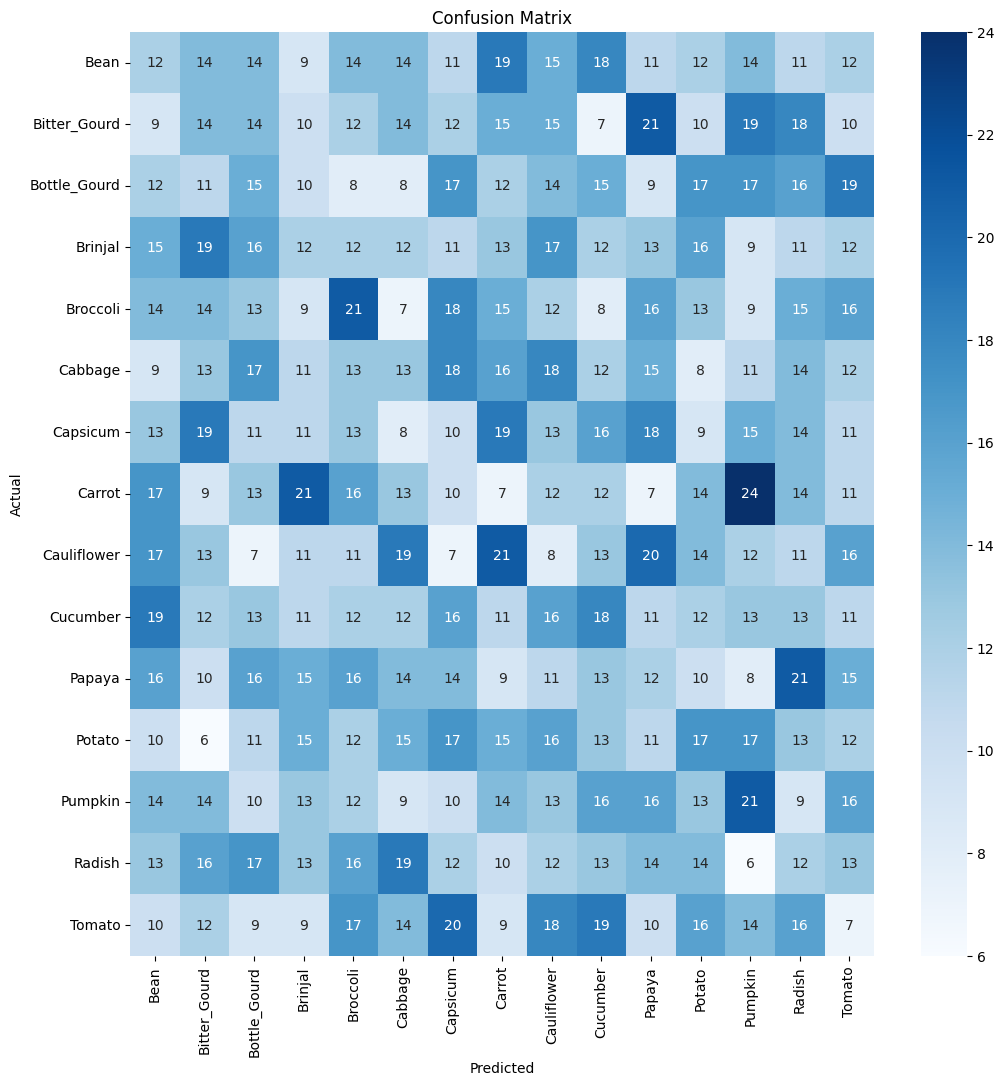

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plotting the confusion matrix
plt.figure(figsize=(12, 12))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=Test_generator.class_indices.keys(),
            yticklabels=Test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [13]:
# Save the model
model.save('my_model.h5')

## *Thank you* 